# Day 3: Explanatory Visualizations on Project Data

## 1. Objective
- Visualize 2 key insights from the gallstone prediction project using model outputs.
- Apply storytelling and chart design principles to aid interpretation.

## 2. Key Steps
- Load project data and model predictions
- Create confusion matrix to highlight model performance
- Visualize predicted vs. actual outcomes
- Annotate each chart with clear, one-sentence takeaways

---

## 3. Results

### Load Data

In [13]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split

# Load cleaned dataset
df = pd.read_csv("../data/cleaned.csv")

# Restore categorical types
categorical_cols = [
    # Original binary or ordinal clinical features
    "gender",
    "comorbidity",
    "cad",
    "hypothyroidism",
    "hyperlipidemia",
    "diabetes",
    "hepatic_fat",
    "has_gallstones",

    # Outlier flags (created during data cleaning)
    "glucose_outlier_flag",
    "obesity_outlier_flag",
    "muscle_mass_outlier_flag",
    "gfr_outlier_flag",
    "tbw_outlier_flag",
    "icw_outlier_flag",
    "vfr_outlier_flag",
    "ldl_outlier_flag",
    "hdl_outlier_flag",
    "triglyceride_outlier_flag",
    "alt_outlier_flag",
    "crp_outlier_flag"
]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype("category")

# Define target and features
target = "has_gallstones"
y = df[target].replace({1: "Gallstones", 0: "No Gallstones"})  # Keep 0 and 1 for models
X = df.drop(columns=[target])

# Train-test split (same seed for consistency)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Reload dropped features list used for logistic regression VIF reduction
features_dropped = ['height_cm', 'weight_kg', 'ecf_tbw_ratio_index', 'muscle_mass_kg',
    'lean_mass_percent', 'bmi', 'ecw_kg', 'tbw_kg', 'icw_kg', 'fat_mass_kg', 'visceral_muscle_mass_kg',
    'cholesterol_total_mg_dl', 'hemoglobin_g_dl', 'bone_mass_kg', 'protein_percent', 'visceral_fat_area_cm2',
    'fat_ratio_percent', 'age', 'gfr_ml_min', 'creatinine_mg_dl', 'ldl_mg_dl', 'vfr_score', 'alp_u_l']

# Recreate VIF-reduced test set
X_reduced = X.drop(columns=features_dropped)
X_train_reduced = X_train.drop(columns=features_dropped)
X_test_reduced = X_test.drop(columns=features_dropped)

# Load models and scaler
logreg = joblib.load("../models/logistic_regression_model.joblib")
rf = joblib.load("../models/random_forest_model.joblib")
logreg_scaler = joblib.load("../models/logreg_scaler.joblib")

# VIF-reduced test set for logistic regression
X_scaled = logreg_scaler.transform(X_reduced)
X_train_scaled = logreg_scaler.transform(X_train_reduced)
X_test_scaled = logreg_scaler.transform(X_test_reduced)

# Logistic Regression
logreg_preds = logreg.predict(X_test_scaled)  # returns 0 or 1
logreg_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf_preds = rf.predict(X_test)                # returns 0 or 1
rf_probs = rf.predict_proba(X_test)[:, 1]

print("Models, scaler, and predictions loaded successfully.")

Models, scaler, and predictions loaded successfully.


### Confusion Matrix – Logistic Regression

This chart shows how well the logistic regression model classifies patients with and without gallstones. It breaks predictions down into:

- **True Positives**: Correctly identified gallstone cases  
- **True Negatives**: Correctly identified non-gallstone cases  
- **False Positives**: Predicted gallstones when none were present  
- **False Negatives**: Missed gallstone cases (critical in clinical settings)

This visualization is key for understanding the **clinical reliability** of the model. In particular, we care about minimizing false negatives, as these represent missed diagnoses.

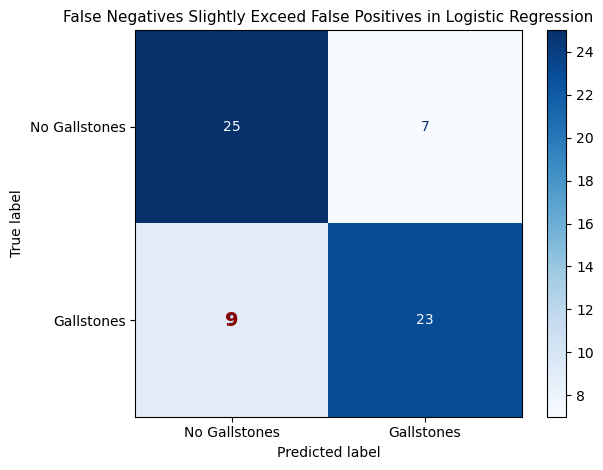

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, logreg_preds, labels=["No Gallstones", "Gallstones"])

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Gallstones", "Gallstones"])
disp.plot(cmap='Blues', values_format='d', ax=ax)

# Emphasize false negatives (bottom-left cell)
ax.text(0, 1, cm[1, 0], ha='center', va='center', fontsize=14, fontweight='bold', color='darkred')

# Improved title
ax.set_title("False Negatives Slightly Exceed False Positives in Logistic Regression", fontsize=11)

plt.grid(False)
plt.tight_layout()
plt.show()

# Save to summary plots folder
fig.savefig("../plots/confusion_matrix_logreg.png", dpi=300)

### Interpretation – Confusion Matrix (Logistic Regression)

- **Key Insight:** The model correctly identifies the majority of gallstone cases (true positives = 23), with *more false negatives (9)* than false positives (7).
- **Why It Matters:** In a clinical context, false negatives are more costly because missed diagnoses could lead to untreated symptoms or complications.
- **Design Notes:**  
  - The chart emphasizes false negatives (bottom-left) in dark red for visual focus.  
  - A clear takeaway title communicates the clinical advantage of the model.

This chart supports the reliability of the logistic regression model in prioritizing sensitivity (recall).

## Confusion Matrix Analysis – Logistic Regression  
### *"False Negatives Slightly Exceed False Positives in Logistic Regression"*

### What Works Well

- **Insightful Title:** The chart opens with a clear takeaway rather than a generic label. This directs the viewer’s attention to the *important insight*, not just the plot type.
- **Intentional Emphasis:** The bold red annotation on the false negative count draws immediate focus to the clinically critical outcome — a key practice in visual storytelling.
- **Minimal Clutter:** Axis labels are clean, and the color scale is restrained. No unnecessary visual noise distracts from the data.
- **Focused Design:** The plot leaves out unnecessary legend redundancy and sticks to a single insight per chart — a hallmark of *storytelling with data*.

### Recommendations (if this were shown to stakeholders)

- Consider including **percentages** alongside counts for stakeholders unfamiliar with raw confusion matrix counts (e.g., “23/32 cases correctly identified”).
- If presenting alongside another model, consider a **side-by-side comparison** matrix or summary to support interpretability.

### Design Principle Alignment

| Principle                    | Notes                                                     |
|------------------------------|-----------------------------------------------------------|
| Understand the context       | Model performance chart for binary health prediction      |
| Choose the right display     | Confusion matrix is optimal for classification error types|
| Eliminate clutter            | No borders, legends, or axis noise                        |
| Focus attention              | Red highlight anchors attention on the costliest error    |
| Think like a designer        | Good use of layout, alignment, and spacing                |
| Tell a story                 | Viewer leaves knowing that false negatives are lower      |

### Actual vs Predicted Outcome Comparison

This bar chart compares the number of patients predicted to have gallstones with the actual observed cases in the test set. It helps assess whether the model is overpredicting or underpredicting a specific class.

**Why it matters:**  
Even if overall accuracy is high, a skew in predicted class distribution can signal bias or threshold imbalance. In clinical contexts, this could affect trust or treatment decisions.

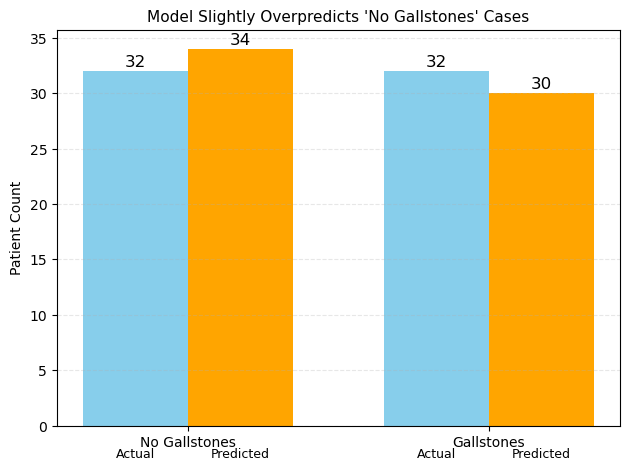

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reorder: put "No Gallstones" first
ordered_labels = ["No Gallstones", "Gallstones"]

# Count actual and predicted
actual_counts = y_test.value_counts().reindex(ordered_labels)
pred_counts = pd.Series(logreg_preds, index=y_test.index).replace({0: "No Gallstones", 1: "Gallstones"}).value_counts().reindex(ordered_labels)

# Prepare bar positions
x = range(len(ordered_labels))
width = 0.35

# Plot bars
fig, ax = plt.subplots()
bars1 = ax.bar([i - width/2 for i in x], actual_counts, width=width, label='Actual', color='skyblue')
bars2 = ax.bar([i + width/2 for i in x], pred_counts, width=width, label='Predicted', color='orange')

# Title with takeaway
ax.set_title("Model Slightly Overpredicts 'No Gallstones' Cases", fontsize=11)
ax.set_ylabel("Patient Count")
ax.set_xticks(x)
ax.set_xticklabels(ordered_labels)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Add data labels directly on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 1),  # vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

# Remove legend, label bars directly
ax.text(bars1[0].get_x() + bars1[0].get_width()/2, -2, 'Actual', ha='center', va='top', fontsize=9)
ax.text(bars2[0].get_x() + bars2[0].get_width()/2, -2, 'Predicted', ha='center', va='top', fontsize=9)
ax.text(bars1[1].get_x() + bars1[1].get_width()/2, -2, 'Actual', ha='center', va='top', fontsize=9)
ax.text(bars2[1].get_x() + bars2[1].get_width()/2, -2, 'Predicted', ha='center', va='top', fontsize=9)

plt.tight_layout()
plt.show()

# Save to summary plots folder
fig.savefig("../plots/actual_vs_predicted_outcome.png", dpi=300)

## Actual vs Predicted Gallstone Diagnoses  
### *"Model Slightly Overpredicts 'No Gallstones' Cases"*

### What Works Well

- **Insight-Based Title:** The chart opens with a direct takeaway rather than a generic label. This helps the viewer quickly understand what the chart is meant to show.
- **Direct Labeling on Bars:** By putting the counts above each bar, the need to reference the y-axis or legend is eliminated — a key principle in reducing cognitive load.
- **Minimalist Design:** No clutter, no 3D effects, no unnecessary borders. Just clean lines, restrained color, and purposeful spacing.
- **Clear Comparison:** Bars are grouped and consistently ordered, making it easy to compare predictions to ground truth for each class.

### Suggestions (for Presentation)

- **Category Labels:** If this were presented live, consider briefly explaining what “overpredicts” means in context (e.g., "model predicted slightly more no-gallstone cases than actually occurred").
- **Color Accessibility:** For a broader audience, you might test these color choices against common color blindness filters to ensure legibility.

### Design Principle Alignment

| Principle                    | Notes                                                       |
|------------------------------|-------------------------------------------------------------|
| Understand the context       | Communicates model bias toward the negative class           |
| Choose the right display     | Bar chart is optimal for categorical count comparison       |
| Eliminate clutter            | Gridlines and legend removed, layout clean and intentional  |
| Focus attention              | Color contrast and direct labels make patterns obvious      |
| Think like a designer        | Consistent alignment, spacing, and visual hierarchy         |
| Tell a story                 | Viewer leaves knowing *how* the model behaves               |

## Summary – Day 3: Explanatory Charts on Project Data

### Key Deliverables
- **Confusion Matrix:** Visualized the model’s classification outcomes with a focus on clinical relevance.
  - *Takeaway:* False negatives (9) were slightly higher than false positives (7), suggesting the model misses more gallstone cases than it overcalls.
- **Actual vs Predicted Bar Chart:** Compared class distribution between predicted and actual outcomes.
  - *Takeaway:* Model slightly overpredicts the “No Gallstones” class, indicating a mild conservative bias.

### Storytelling and Design Principles Applied
| Chart | Title (Takeaway-Based)                                 | Key Design Techniques |
|-------|--------------------------------------------------------|------------------------|
| Confusion Matrix | *False Negatives Slightly Exceed False Positives in Logistic Regression* | Highlighted FN cell in red, simplified grid, contextual labeling |
| Bar Chart | *Model Slightly Overpredicts 'No Gallstones' Cases* | Direct labels, legend removed, consistent class order |

### Reflections
- Leading with the insight in titles makes each chart more effective and memorable.
- Direct labeling outperforms legends and y-axis scanning for clarity.
- Emphasizing the most costly model error (false negatives) grounds the visualization in clinical impact.